In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In order to see visualizations for section 6 (Running Backs and Quaterbacks) - please install plotly package on your machine

## Abstract

   Fantasy Football is played by millions within the United States and continues to become more popualar year over year. While some may choose their players based off rooting interests, statistical analysis is helpful to pick a true winning team and to find players that offer great draft value. Using player statistics, we are meaningfully visualizing performance data to provide fantasy users with information and guidance towards the best value players to select. The data being used will consist of the past 4-6 years of NFL players individual statistical performances. All major, offensive stats that fall under the categories of passing, receiving, and rushing will be present within the dataset and will be used differently when analyzing each position. Not only will the data be visualized to provide all information, but a basic linear predictor is included to predict player performance for the upcoming season in the case of someone being interested in drafting that player. Overall, the analysis offers any fantasy player a useful tool kit of information and suggestions against established yearly rankings.
    

### 1. Introduction

This projects purpose is to provide an overview of fantasy football statistics and create visualizations and a working predictor that can guide users in the fantasy draft process towards selecting higher value players. Using a dataset containing past years of offensive player statistics pulled from the Pro Football Reference data repository, the data can be processed and grouped to analyze different position groups and decide what players within each group will be the best options. The project utilizes scatter and bar plots that point toward key volume statistics that are important signalers of fantasy football performance. A holt-winters predicitve model is also available to get a basic prediction for the upcoming year regarding how well a player will perform. Using these tools and comparing what can be observed within them against expert, ESPN fantasy rankings, high value players can be observed and users can plan to select these players within their upcoming fantasy draft. 

### 2. Problem Definition

The problem being solved within this data analytics project is providing statistical insight into what players will be the best choices within the upcoming fantasy draft season. Any person who plays fantasy football would benfit from this solution as they would gain insight to statistical trends of players and statistical totals that make selecting a player more attractive. While major sources release draft rankings each year, this analysis will allow players who are not ranked as high to have their value recognized and selected accordingly. This information, coupled with a general knowledge of the league can promote better team performance in all kinds of fantasy leagues. While many factors can be unpredictable within professional football such as major injuries, the analysis will suggest players with the greatest usage and best performance relative to their overall draft position. 

### 3. Data Sources

The original dataset being used was pulled from reddit. It is an Excel file whose data is pulled directly from the Pro Football Reference data repository of NFL player statistics. Each sheet within the Excel file contains a seperate year of statistical data and takes on the same format containing 23 features that include identifying features such as name and position followed by many unique statistical categories. Since the original data file only contained data from 2008 through the 2017 season, we manually pulled the most recent data so that the overall dataset could be as current as possible. Also, we adjusted the naming conventions used as column names so that they would be completley unique and easy to understand. Since players retire and regress among other things, there is no reason to include data going back any more than three to four years since the information in these cases becomes irrelevant. Also, with only so many roster spots avaialble within the fantasy draft, any players that are irrelevant will not be included in the analysis. This means that career backups and underperforming players won't be considered as drafting any of them would be a waste of a pick and presents no value to team owners.

### 4. Acquiring and Loading Data

Each set of data is going to be loaded into seperate dataframes that differ based on the year of the data. Only the most recent four years of data will be loaded since anything beyond that is not very representative of player performance. Everything will pull in from the existing dataset that is in the form of an Excel file and pandas will be utilized to read everything. 

In [3]:
#Load four years of the data from the excel file into individual dataframes. 

df_2015 = pd.read_excel('Fantasy_Data.xlsx', header = 1, sheet_name = '2015')
df_2016 = pd.read_excel('Fantasy_Data.xlsx', header = 1, sheet_name = '2016')
df_2017 = pd.read_excel('Fantasy_Data.xlsx', header = 1, sheet_name = '2017')
df_2018 = pd.read_excel('Fantasy_Data.xlsx', header = 1, sheet_name = '2018')

### 5. Wrangling and Cleansing Data

As each set of yearly data is loaded, a column that identifies the year will be appended to the set along with a column that is a calculation of the players average points per game for that season. From here, everything will be merged into a single dataset so that the necessary information is easy to filter when visualizing statistics by position. Irrelevant players and retired players will also be removed based on value thresholds that are established such as irrelevant players being removed if they do not average a certain amount of points per game. 

In [5]:
#Add year identifier column
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018

In [6]:
#Add column for avg_ppg
#Calculation is the PPR value divided by the number of Games
df_2015['Avg_PPG'] = (df_2015.PPR / df_2015.Games)
df_2016['Avg_PPG'] = (df_2016.PPR / df_2016.Games)
df_2017['Avg_PPG'] = (df_2017.PPR / df_2017.Games)
df_2018['Avg_PPG'] = (df_2018.PPR / df_2018.Games)

In [7]:
#Combine the four resulting dataframes into a master dataframe for filtering purposes within the analysis
frames = [df_2015, df_2016, df_2017, df_2018]
df = pd.concat(frames)
df = df.reset_index(drop = True)

In [8]:
len(df)

2373

In [9]:
#Many of the irrelevant players do not have their positions labled
#Drop any name whose Position is null

df = df[df.FantPos.isin(['QB','RB','WR','TE'])]

#Drop out any players that do not average at least 7 points per game
df = df[df.Avg_PPG >= 7]

#Reset index
df = df.reset_index(drop = True)

In [10]:
len(df)

860

In [11]:
#Break Players out into their individual positions for analysis ... Each position will be contained within its own DF

qb = df[df.FantPos == 'QB'].reset_index(drop = True)
rb = df[df.FantPos == 'RB'].reset_index(drop = True)
wr = df[df.FantPos == 'WR'].reset_index(drop = True)
te = df[df.FantPos == 'TE'].reset_index(drop = True)

In [12]:
#Show the length of each positional dataframe
print(len(qb),len(rb),len(wr),len(te))

185 246 329 100


### 6. Exploring and Visualizing Data

## Running Backs

In [13]:
#Provide Data preview of Running Backs
rb.head().style

,Name,Tm,FantPos,Age,Games,Games_Started,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_Y/A,Rush_TD,Rec_Tgt,Rec,Rec_Yds,Rec_Y/R,Rec_TD,FantPt,PPR,PosRank,Year,Avg_PPG
0,Devonta Freeman,ATL,RB,23,15,13,0,0,0,0,0,265,1056,3.98,11,97,73,578,7.92,3,243,316,1,2015,21.0667
1,Adrian Peterson,MIN,RB,30,16,16,0,0,0,0,0,327,1485,4.54,11,36,30,222,7.4,0,231,261,2,2015,16.3125
2,Doug Martin,TAM,RB,26,16,16,0,0,0,0,0,288,1402,4.87,6,44,33,271,8.21,1,199,232,3,2015,14.5
3,DeAngelo Williams,PIT,RB,32,16,10,0,0,0,0,0,200,907,4.54,11,47,40,367,9.18,0,191,231,4,2015,14.4375
4,Todd Gurley,STL,RB,21,13,12,0,0,0,0,0,229,1106,4.83,10,26,21,188,8.95,0,189,210,5,2015,16.1538


In [14]:
#Pull in necessary data columns
rb_vis = rb[['Name','Rush_Att','Rush_Yds','Rush_Y/A','Rush_TD','Rec_Tgt','Rec_TD','Avg_PPG','PosRank']]

In [15]:
#Groups the data by name to combine the years of data and calls the mean function to average the three other features
#The results are then sorted by the average position rank of the player
#Data is indexed by name before grouping to provide clean result
rb_vis = rb_vis.set_index('Name')
rb_vis = rb_vis.groupby(by = 'Name').mean().sort_values('Avg_PPG', ascending = False)

#Since entries are beign sorted by average PPG, only include the top half for the analysis
rb_vis = rb_vis.head(60)

In [16]:
# Create a trace is similar to a plot object in matplotlib using plotly
trace = go.Scatter(x = rb_vis.Rec_Tgt, y = rb_vis.Rush_Att , mode = 'markers', text = rb_vis.index,
                  marker = dict(size = 12, color = rb_vis.Rush_TD, colorscale = 'Jet', showscale=True))

#Defining a layout for the trace which is just meant to label all of the axis on the graph
layout= go.Layout(title = "Average Rushing Attempts & Receiving Targets (Color = Rush TD's)", hovermode = 'closest',
    xaxis = dict( title = 'Average Receiving Targets'),
    yaxis = dict(title = 'Average Rush Attempts'))
                   
#Create a figure using the trace and layout specified and then plotting them both
fig = go.Figure(data = [trace], layout = layout)
py.iplot(fig)

In [17]:
rb_var = rb[['Name','Avg_PPG']]

In [18]:
#Groups the data by name to combine the years of data and calls the mean function to average the three other features
#The results are then sorted by the average position rank of the player
#Data is indexed by name before grouping to provide clean result
rb_var = rb_var.set_index('Name')
rb_var = rb_var.groupby(by = 'Name').var()

In [19]:
#Join the new column for variance in point per game to the original df above that contains all the avergae statistics
rb_vis = rb_vis.join(rb_var, on = 'Name', rsuffix = '_Var')
#Fill all NANs with zero
rb_vis = rb_vis.fillna(0)

In [20]:
#Drop out noticeable retired players
rb_vis = rb_vis.drop(['Jamaal Charles','Arian Foster','DeMarco Murray','DeAngelo Williams'])

In [21]:
# Create a trace is similar to a plot object in matplotlib using plotly
trace = go.Scatter(x = rb_vis.Avg_PPG, y = rb_vis.Avg_PPG_Var, mode = 'markers', text = rb_vis.index,
                  marker = dict(size = 12, color = rb_vis.Rush_Att, colorscale = 'Jet', showscale=True))

#Defining a layout for the trace which is just meant to label all of the axis on the graph
layout= go.Layout(title = "RB Point Per Game Variation (Color = Rush Att's)", hovermode = 'closest',
    xaxis = dict( title = 'Average PPG'),
    yaxis = dict(title = 'Variation'))
                   
#Create a figure using the trace and layout specified and then plotting them both
fig = go.Figure(data = [trace], layout = layout)
py.iplot(fig)

The running back visualizations are both scatterplots that differ in what they represent. The first graph above (Average Rushing Attempts & Receiving Targets) shows the average total rushing attempts and average receiving targets that each player is given each year. Plots on this graph that are farthest right are receiving high amounts of passing targets while the higher points within the graph are receiving a large volume of rushing attempts. Since volume translates to points in fantasy football, players that are towards the top right of the graph will present greater draft value. 

The second graph (RB Point Per Game Variation) analyzes the year over year variation in a player’s average points per game scored. Players towards the bottom right of this graph will be players that are averaging a high point per game total on a consistent year to year basis. These players can be concluded to be safe options that will not underperform and do not have a history of missing games due to injury or other factors. Players that are sitting at the zero-variation mark within the graph can be ignored as they all only have one year of data making it impossible for there to be any variation.  


## Wide Receivers

In [22]:
#Providing data preview for the Wide Reveiver table 
wr.head(5)

,Name,Tm,FantPos,Age,Games,Games_Started,Cmp,Pass_Att,Pass_Yds,Pass_TD,...,Rec_Tgt,Rec,Rec_Yds,Rec_Y/R,Rec_TD,FantPt,PPR,PosRank,Year,Avg_PPG
0,Antonio Brown,PIT,WR,27.0,16,16,0,0,0,0,...,193.0,136,1834,13.49,10,250.0,386.0,1,2015,24.125000
1,Julio Jones,ATL,WR,26.0,16,16,0,0,0,0,...,203.0,136,1871,13.76,8,235.0,371.0,2,2015,23.187500
2,Brandon Marshall,NYJ,WR,31.0,16,16,0,0,0,0,...,173.0,109,1502,13.78,14,230.0,339.0,3,2015,21.187500
3,Allen Robinson,JAX,WR,22.0,16,16,0,0,0,0,...,151.0,80,1400,17.50,14,224.0,304.0,4,2015,19.000000
4,Odell Beckham,NYG,WR,23.0,15,15,0,0,0,0,...,158.0,96,1450,15.10,13,223.0,319.0,5,2015,21.266667


In [23]:
#Pulling needed columns for the visualization and analysis
wr_vis = wr[['Name','Rec_Tgt','Rec_TD','Avg_PPG','PPR','PosRank']]

#Groups the data by name to combine the years of data and calls the mean function to average the three other features
#The results are then sorted by the average position rank of the player
#Data is indexed by name before grouping to provide clean result
wr_vis = wr_vis.set_index('Name')
wr_vis = wr_vis.groupby(by = 'Name').mean().sort_values('Avg_PPG', ascending = False)

In [24]:
#Setting the average points per game treshold for players to be displayed
wr_vis = wr_vis[wr_vis.Avg_PPG >= 8]
#Setting the at least 125 points or above theshold 
wr_vis = wr_vis[wr_vis.PPR >= 125]
#Selecting only top 20 and assigning ascending order to be from highest to lowest by Receiving Targeted
wr_vis=wr_vis.sort_values(by=['Rec_Tgt'], ascending=False)[:35]
#Reset the index to graph
wr_vis = wr_vis.reset_index()
wr_vis
#Displaying the table with determined conditions

,Name,Rec_Tgt,Rec_TD,Avg_PPG,PPR,PosRank
0,DeAndre Hopkins,170.000000,9.750000,18.660937,293.375000,12.250000
1,Antonio Brown,169.500000,11.500000,22.214345,333.675000,2.000000
2,Julio Jones,162.500000,6.250000,19.505134,302.725000,4.750000
3,Jarvis Landry,151.750000,5.250000,15.267188,244.275000,17.250000
4,Brandon Marshall,150.500000,8.500000,15.793750,247.500000,28.000000
5,Calvin Johnson,149.000000,9.000000,16.312500,261.000000,9.000000
6,Mike Evans,148.750000,7.000000,16.127083,251.100000,13.000000
7,Larry Fitzgerald,142.000000,6.750000,15.182813,242.925000,16.750000
8,Terrelle Pryor,140.000000,4.000000,13.437500,215.000000,16.000000
9,Michael Thomas,139.000000,7.666667,17.657639,276.833333,8.333333


Text(0.5, 1.0, 'Wide Receivers')

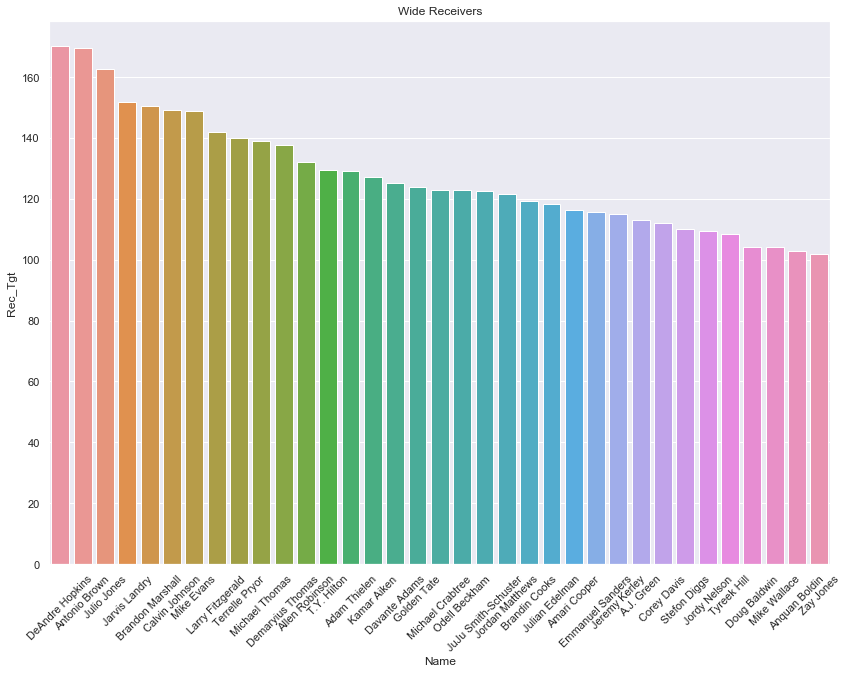

In [25]:
#Setting the visualization sizes
sns.set(rc={'figure.figsize':(14,10)})
#Selecting the visualization - barplot presenting Names on x-axis and Receving Targeted on y-axis
wr_vis=sns.barplot(x= 'Name', y='Rec_Tgt', data=wr_vis, capsize=1)
#Setting the labels and titles appropriately for the visualization
wr_vis.set_xticklabels(wr_vis.get_xticklabels(), rotation=45)
#Setting the title of the Graph
wr_vis.set_title('Wide Receivers')

The Visualization for wide receivers is displaying an analysis of each players average targets per year. For a wide receiver to score fantasy points, they need to be getting the ball thrown to them alot. Since each successful catch counts as a point, the more often a recevier is targeted within their offense the greater scoring potetnial they will have. Any player who catches many touchdowns and is also being targeted in high volumes will be the most valueable players to acquire.

## Tight Ends

In [26]:
##Providing data preview for the Tight Ends table 
te.head(5)

,Name,Tm,FantPos,Age,Games,Games_Started,Cmp,Pass_Att,Pass_Yds,Pass_TD,...,Rec_Tgt,Rec,Rec_Yds,Rec_Y/R,Rec_TD,FantPt,PPR,PosRank,Year,Avg_PPG
0,Rob Gronkowski,NWE,TE,26.0,15,15,0,0,0,0,...,120.0,72,1176,16.33,11,184.0,256.0,1,2015,17.066667
1,Gary Barnidge,CLE,TE,30.0,16,13,0,0,0,0,...,125.0,79,1043,13.20,9,158.0,237.0,2,2015,14.812500
2,Jordan Reed,WAS,TE,25.0,14,9,0,0,0,0,...,114.0,87,952,10.94,11,157.0,244.0,3,2015,17.428571
3,Greg Olsen,CAR,TE,30.0,16,16,0,0,0,0,...,124.0,77,1104,14.34,7,150.0,227.0,4,2015,14.187500
4,Delanie Walker,TEN,TE,31.0,15,10,0,0,0,0,...,133.0,94,1088,11.57,6,150.0,244.0,5,2015,16.266667


In [27]:
#Pulling needed columns for the visualization and analysis
te_vis = te[['Name','Rec_Tgt','PosRank','Avg_PPG']]
#Setting the at least more than  average of 6 points per game  or above theshold 
te_vis = te_vis[te_vis.Avg_PPG >= 6]
#Selecting only top 20 and assigning ascending order to be from highest to lowest by Receiving Targeted and Average Points per Game
te_vis=te_vis.sort_values(by=['Rec_Tgt', 'Avg_PPG'], ascending=False)[:50]

Text(0.5, 1.0, 'Tight Ends')

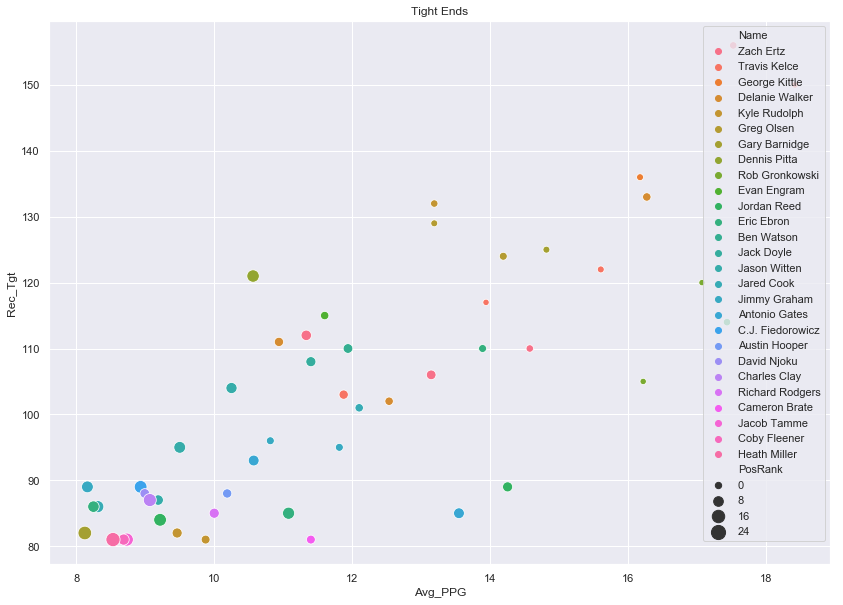

In [28]:
#Setting the visualization sizes
sns.set(rc={'figure.figsize':(14,10)})
#Selecting the visualization - scatterplot with Average Points per Game on x-axis, Reciving Targeted on y-axis, color coded bubles for Names and sizes of bubbles based on Ranking
te_vis=sns.scatterplot(x='Avg_PPG', y='Rec_Tgt', data=te_vis, hue='Name', size='PosRank', sizes=(40,200))
#Setting the title of the graph
te_vis.set_title('Tight Ends')

Instead of combining everything and grouping statistics together, this visualization tries to take a different approach. It shows the top 50 seasons by tight ends based on targets and ppg and plots everything within a scatter plot. This allows the user not only to be able to see what players have had the best individual season performances, but also allows the ability to see how many seasons a player was high enough performing to have their data included within the graph. Any results that are toward the top right of the graph represent the best tight end performances as these points have high target volumes as well as high point per game averages. The graph can also be used to look for multiple colored points that represent the same player. Multiple appearances within the graph points towards a players consistency which is vital in fantasy football. 

## Quaterbacks

Best identifying traits for quality Quarterback talent is observing the average amount of Pass attempts they average per year along with their average points scored per game. In fantasy football volume is king and presents the most opportunity for points to be scored. It is vital to select the Quarterbacks that are seeing this volume as their scoring potetntial will be high

In [29]:
# Show top four of QB DataFrame just quickly check that only QBs are in the set and give a data preview
qb.head(4)

,Name,Tm,FantPos,Age,Games,Games_Started,Cmp,Pass_Att,Pass_Yds,Pass_TD,...,Rec_Tgt,Rec,Rec_Yds,Rec_Y/R,Rec_TD,FantPt,PPR,PosRank,Year,Avg_PPG
0,Cam Newton,CAR,QB,26.0,16,16,296,495,3837,35,...,0.0,0,0,NaN,0,391.0,391.0,1,2015,24.4375
1,Tom Brady,NWE,QB,38.0,16,16,402,624,4770,36,...,1.0,1,36,36.0,0,344.0,345.0,2,2015,21.5625
2,Russell Wilson,SEA,QB,27.0,16,16,329,483,4024,34,...,0.0,0,0,NaN,0,342.0,342.0,3,2015,21.3750
3,Blake Bortles,JAX,QB,23.0,16,16,355,606,4428,35,...,0.0,0,0,NaN,0,324.0,324.0,4,2015,20.2500


In [30]:
#Pull in necessary data columns
qb_vis = qb[['Name','Pass_Att','Pass_Yds','Pass_TD','Avg_PPG','PosRank']]

#Set an average point per game threshold to attempt to only include valuable players ... must average at least 12 points
qb_vis = qb_vis[qb_vis.Avg_PPG >= 12]

In [31]:
#Groups the data by name to combine the years of data and calls the mean function to average the three other features
#The results are then sorted by the average position rank of the player
#Data is indexed by name before grouping to provide clean result
qb_vis = qb_vis.set_index('Name')
qb_vis = qb_vis.groupby(by = 'Name').mean().sort_values('PosRank')

In [32]:
# Create a trace is similar to a plot object in matplotlib using plotly
trace = go.Scatter(x = qb_vis.Pass_Att, y = qb_vis.Avg_PPG , mode = 'markers', text = qb_vis.index,
                  marker = dict(size = 12, color = qb_vis.Pass_TD, colorscale = 'Jet', showscale=True))

#Defining a layout for the trace which is just meant to label all of the axis on the graph
layout= go.Layout(title = "QB PPG & Pass Attempts (Color = Avg TD's)", hovermode = 'closest',
    xaxis = dict( title = 'Pass Attempts'),
    yaxis = dict(title = 'Average PPG'))
                   
#Create a figure using the trace and layout specified and then plotting them both
fig = go.Figure(data = [trace], layout = layout)
py.iplot(fig)

The quarterback visualization is a scatterplot that shows individual players average passing attempts along the x-axis and their average point per game total on the y-axis. Players towards the top right of the graph will offer the most value as they are throwing the most passes and also averaging the most points. What stands out within the graph is how grouped the majority of the players are. Besides two outliers because of historical seasons, many of the QB options sit within the range of sixteen to twenty points. This small scoring variance and only the ability to play one Quaterback devalues the position in regards to when it should be drafted.

### 7. Analyzing Data

A basic holt-winters exponential smoothing model is created to predict future performance among players. Any player can be searched for within the function by passing their name and then the model will predict their performance based off the small trend that it sees. This is useful if one was deciding between two different players to choose. They could enter both of them into the function and see which one is predicted to average more points.

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [34]:
#Basic Holt-Winters Predictor of points scored
def project(player):
    
    #Pull values that will be passed into the algorithm
    train = df['Avg_PPG'][df.Name == player].reset_index(drop = True)
    
    # fit model on the train data that was pulled
    model = ExponentialSmoothing(train)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(train), len(train))
    result = yhat[len(train)]
    
    
    print(train)
    print("The Projected PPG for "+ player + " is " + str(result) + " points per game")

In [35]:
project('Ezekiel Elliott')

0    21.666667
1    20.300000
2    21.940000
Name: Avg_PPG, dtype: float64
The Projected PPG for Ezekiel Elliott is 21.302222210340997 points per game


In [36]:
project('Christian McCaffrey')

0    14.31250
1    24.09375
Name: Avg_PPG, dtype: float64
The Projected PPG for Christian McCaffrey is 19.20312483635888 points per game


### 8. Reporting Results
---
*(Use appropriate methods to present the results including tables, plots, and bullet points. Explain how the analysis process and results solve the problem.)*

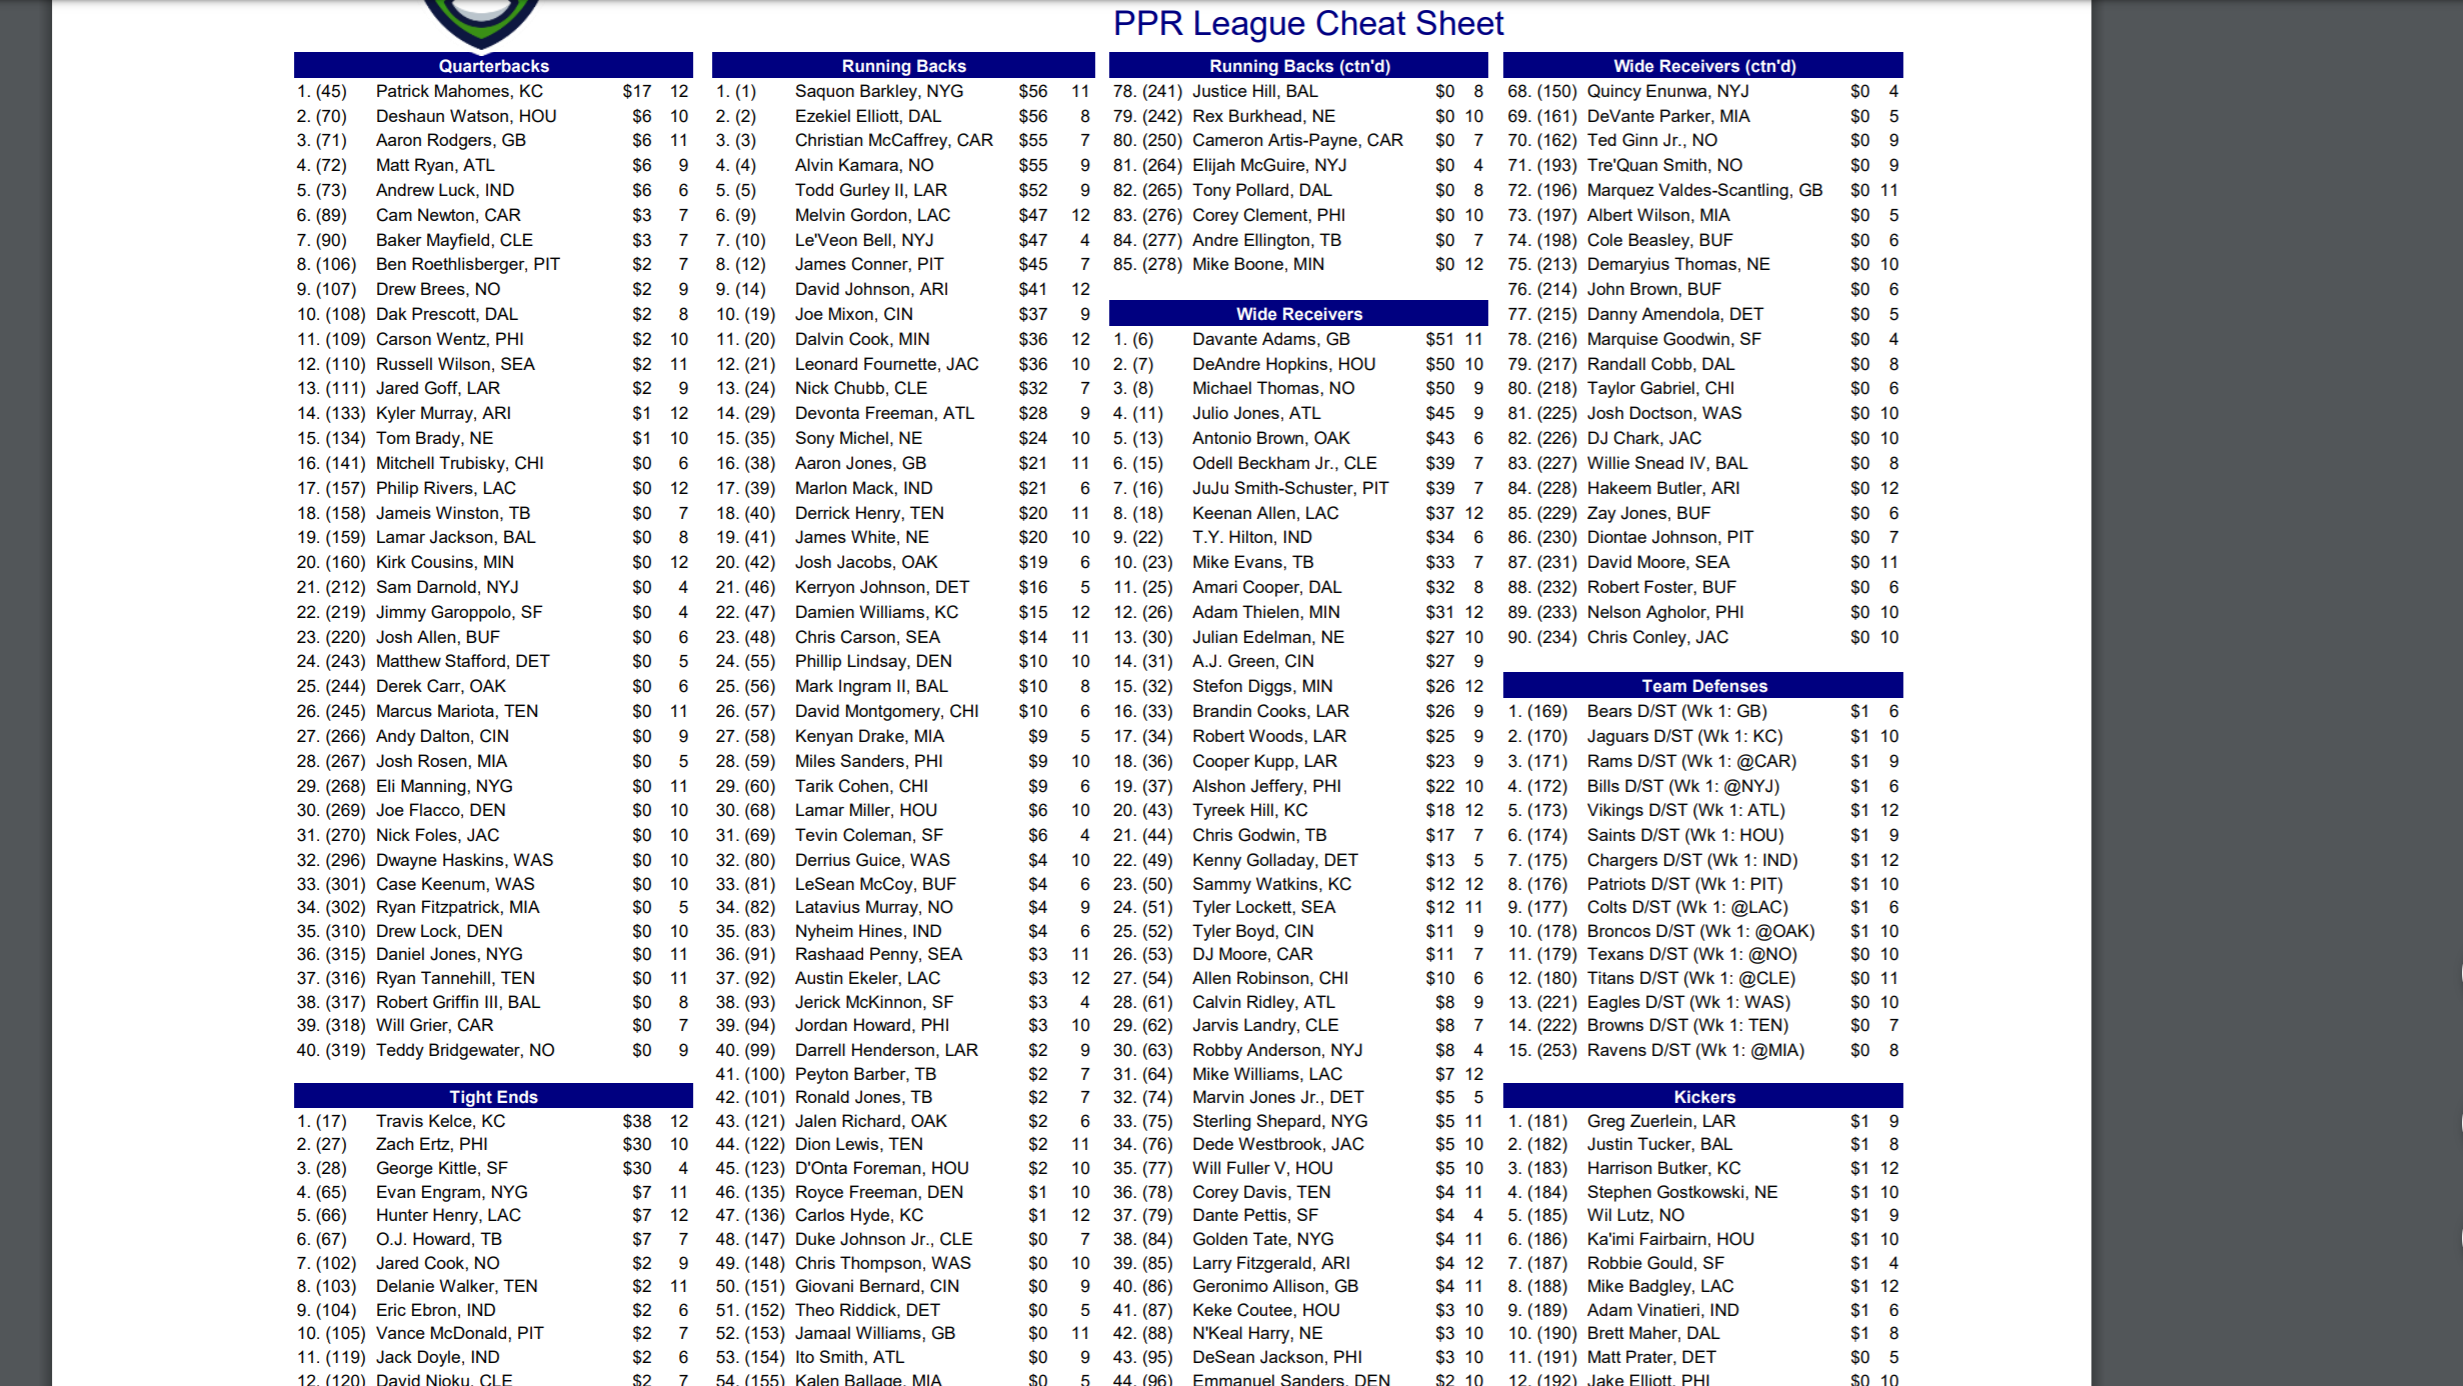

In [37]:
from IPython.display import Image
Image(filename='fantasy_2019.png') 

The picture above shows the early, expert rankings of players that are produced by ESPN each year. Most fantasy drafts will not kick off until the season is much closer and these ranking are likely to change slightly. Even still they will be useful for our end analysis of identifying a few players at each position who are viable fantasy football draft options that won't need to be drafted very early. With limited years of data that can be of value, the best way to observe these players is using the simple predictor as well as the visualizations that are provided above. It is vital to remember that in fantasy football it is not important to draft players with name recognition or players that you like. Volume is king and translates directly into point scoring potential. To win a fantasy league, one needs to find players obtaining high volumes of target shares and players that are consistent. With that said, here are some recomendations:

#### Running Backs

Leonard Fournette - Ranked 12th in the expert rankings

Kenyan Drake - Ranked 27th in the expert rankings

Both players suggeted have proven to be conistent performers based on their variation of average ppg which sit on the low end of the visualization. Fournette is a bell cow back who averages over 200 carries per year and Drake offers a great split of receiving and rushing volume. Both will have increased roles within their improved offenses making them enticing options.  


#### Wide Receivers

Antonio Brown - Ranked 5th in the expert rankings

Jarvis Landry - Ranked 29th in the expert rankings

While Antonio Brown is ranked fairly high at 5, he is a no doubt top 2 wide reciever option. Averaging the second most targets in the league and consistently being a incredible fantasy player, it is worth picking him highly despite the risk of being on a new team

Jarvis Landry is constantly slept on and ranked lowly. A PPR monster, Landry boasts top 5 target numbers. While he may not be a big time playmaking threat, he is thrown the ball so much that he is a worthwhile selection. Even with the Brown's acquisition of Odell Beckham which may take targets away from Landry, it could also open the field up for him even more. A player that is likely to get well over 100 targets and is projected to score 15 a game in the upcoming year should be ranked much higher than 29th.  

#### Tight Ends

Eric Ebron - Ranked 9th in the expert rankings

Ebron broke out last year and took over as his team's number one tight end spot. He was a proven red zone threat and was utilized heavily ont he goaline. Coming off a season in which he averaged over 13 a game and did not have many targets, as a number one option now his target share will increase.



#### Quarterbacks

Phillip Rivers - Ranked 17th in the expert rankings

Tom Brady - Ranked 15th in the expert rankings

Both players are seeing higher passing attempts than the majority of quarterback within the league and are at the head of dynamic offenses with good players. The volume is there and with a few more touchdowns in an up year, either player has the potential to be the top fantasy quarterback this year. With such low rankings either can be selected extremely late in the second wave of backup quarterback selections. 

### 10. References

https://www.thefantasyfootballers.com/articles/financial-outlook-fantasy-football

http://www.espn.com/fantasy/football/story/_/page/TMRDraftDayManifesto18/strategy-risk-management-historical-trends-tips-how-draft-fantasy-football

https://www.draftsharks.com/features/category/draft-strategy

https://plot.ly/python/